<a href="https://colab.research.google.com/github/raviht07/python/blob/main/Titanic_Passenger_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Titanic passenger survival prediction***

##1.Problem Statement

During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

#2.Objective of the project

- Understand passenger survival patterns
- Perform basic data preprocessing
- Conduct minimal but meaningful EDA
- Build binary classification models
- Evaluate model performance
- Identify key survival-influencing features

#3.Exploratary Data Analysis

In [74]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (4).csv


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge

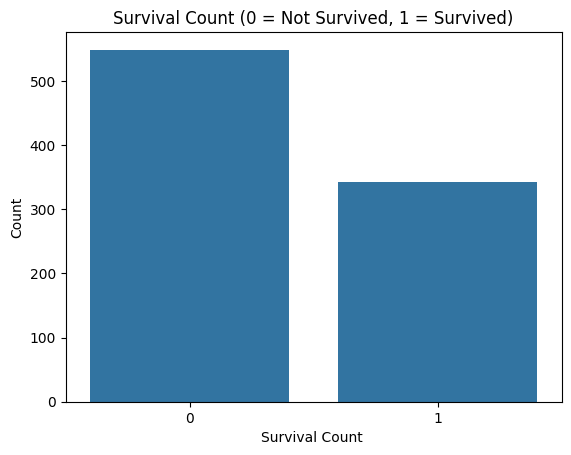

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel("Survival Count ")
plt.ylabel("Count")
plt.show()

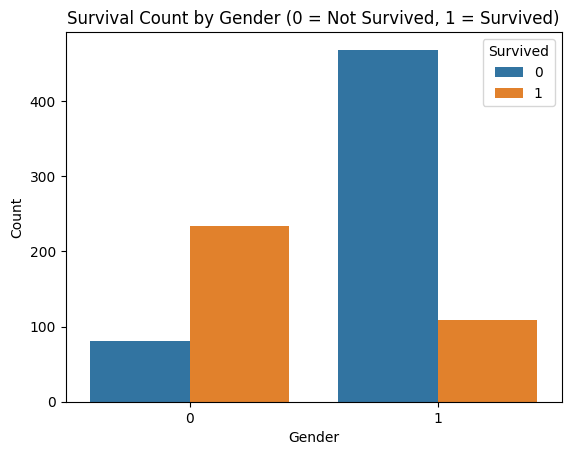

In [77]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender (0 = Not Survived, 1 = Survived)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Fare')

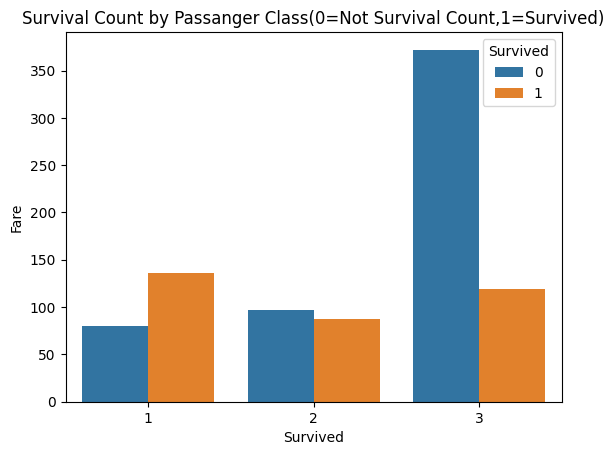

In [78]:
sns.countplot(x='Pclass',hue="Survived",data=df)
plt.title('Survival Count by Passanger Class(0=Not Survival Count,1=Survived)')
plt.xlabel("Survived")
plt.ylabel("Fare")

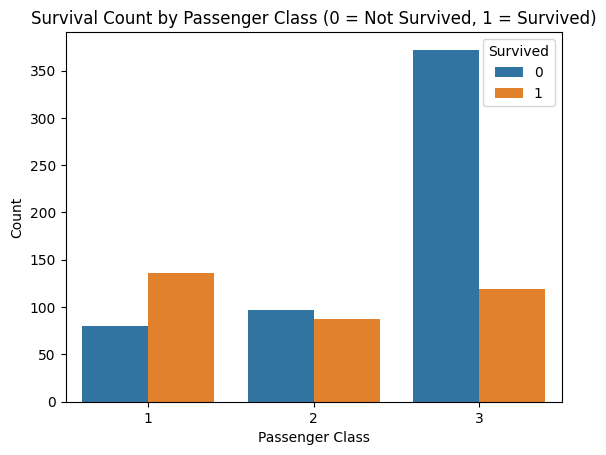

In [79]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class (0 = Not Survived, 1 = Survived)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [80]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [81]:
print("dataset shape:",df.shape)


dataset shape: (891, 12)


In [82]:
df.shape

(891, 12)

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [85]:
num_cols=["Age"]

for col in num_cols:
  df[col]=df[col].fillna(df[col].median())

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [86]:
cat_cols=["Embarked"]

for cols in cat_cols:
  df[cols]=df[cols].fillna(df[cols].mode()[0])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [87]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Embarked']=le.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [89]:
df['Sex']=df['Sex'].map({"male":1,"female":0})
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [90]:
X=df[['Sex','Age','Embarked','Pclass']]
y=df['Survived']

In [91]:
df=pd.DataFrame(X,columns=['Sex','Age','Embarked','Pclass'])
df['Survived']=y
df

,Sex,Age,Embarked,Pclass,Survived
0,1,22.0,2,3,0
1,0,38.0,0,1,1
2,0,26.0,2,3,1
3,0,35.0,2,1,1
4,1,35.0,2,3,0
...,...,...,...,...,...
886,1,27.0,2,2,0
887,0,19.0,2,1,1
888,0,28.0,2,3,0
889,1,26.0,0,1,1


In [92]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [93]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [94]:
prediction=model.predict([[1,22,2,3]])
print("prediction:",prediction[0])

prediction: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [96]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [97]:
y_pred=model.predict(X_test)
print("prediction:",y_pred)

prediction: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]


In [98]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.7988826815642458


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.datasets import load_iris

In [101]:
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred=rf.predict(X_test)
print("prediction:",y_pred)

prediction: [0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("Precision:",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))

evaluate_model(y_test,y_pred)

Accuracy: 0.770949720670391
Precision: 0.726027397260274
Recall: 0.7162162162162162
F1_score: 0.7210884353741497


In [107]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)

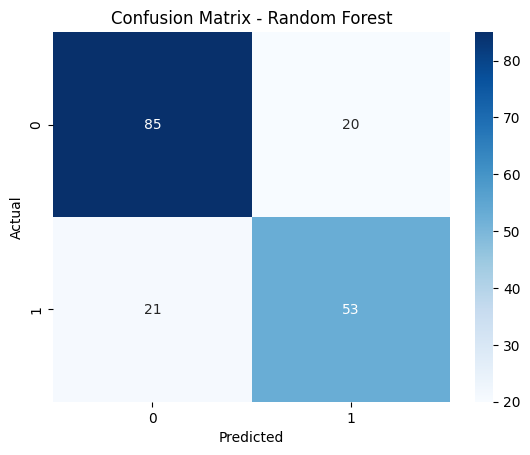

In [108]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [109]:
##classification report
print(classification_report(y_test,y_pred_rf))
# Feature importances
importances = rf.feature_importances_
feature = X.columns

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [110]:
feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

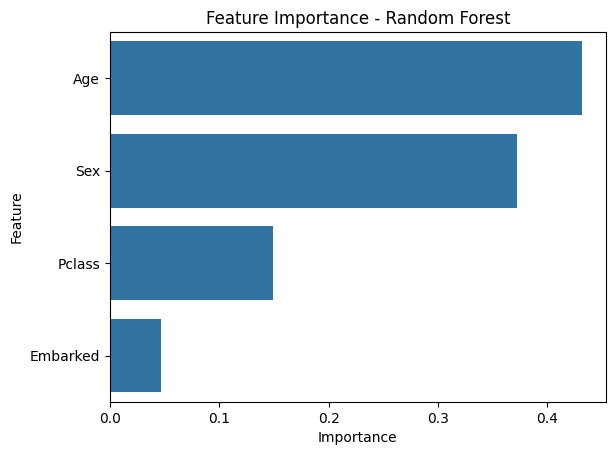

In [111]:
sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance - Random Forest')
plt.show()